# Part 2: Multilayer Perceptrons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)

def make_spirals_data():
    # From http://cs231n.github.io/neural-networks-case-study/
    N = 200 # number of points per class
    D = 2 # dimensionality
    K = 3 # number of classes
    X = np.zeros((N*K,D)) # data matrix (each row = single example)
    y = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
      ix = range(N*j,N*(j+1))
      r = np.linspace(0.0,1,N) # radius
      t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
      X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
      y[ix] = j
    
    return X, y

def plot_data(X, y, title=''):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1],
                c = y, alpha = 0.4, cmap='rainbow')

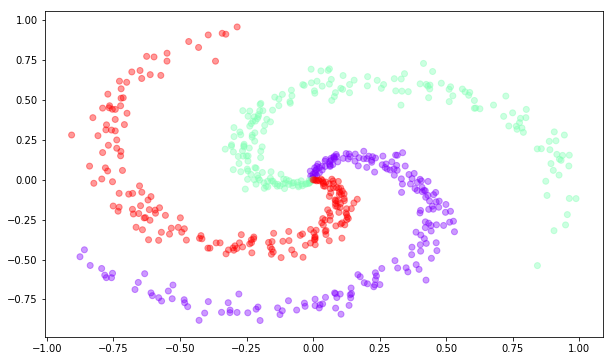

In [2]:
# This spirals dataset has 3 classes we are trying to predict.
X, y = make_spirals_data()
plot_data(X, y)

In [4]:
# Data prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Convert y to one-hot encoding.
# [2] -> [0, 0, 1]
# [1] -> [0, 1, 0]
enc = OneHotEncoder()
y_one_hot = enc.fit_transform(np.expand_dims(y, axis=1)).toarray()

X_train, X_val, y_train, y_val = train_test_split(
    X, y_one_hot, test_size=0.2)

In [5]:
# First, let's try a logistic regression model. 
from keras.models import Sequential
from keras.layers import Dense, Input

# Softmax is generalization of sigmoid to n-dimensions
# It returns vectors of non-negative numbers that sum to one, aka probability distributions.
nclasses = 3
input_shape = (2,)
model = Sequential()
model.add(Dense(nclasses, activation='softmax', input_shape=input_shape))

model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Using TensorFlow backend.


Train on 480 samples, validate on 120 samples
Epoch 1/100
480/480 [==============================] - 0s - loss: 1.0175 - val_loss: 1.0724
Epoch 2/100
480/480 [==============================] - 0s - loss: 1.0143 - val_loss: 1.0688
Epoch 3/100
480/480 [==============================] - 0s - loss: 1.0112 - val_loss: 1.0652
Epoch 4/100
480/480 [==============================] - 0s - loss: 1.0081 - val_loss: 1.0617
Epoch 5/100
480/480 [==============================] - 0s - loss: 1.0052 - val_loss: 1.0583
Epoch 6/100
480/480 [==============================] - 0s - loss: 1.0021 - val_loss: 1.0549
Epoch 7/100
480/480 [==============================] - 0s - loss: 0.9991 - val_loss: 1.0516
Epoch 8/100
480/480 [==============================] - 0s - loss: 0.9963 - val_loss: 1.0483
Epoch 9/100
480/480 [==============================] - 0s - loss: 0.9934 - val_loss: 1.0450
Epoch 10/100
480/480 [==============================] - 0s - loss: 0.9905 - val_loss: 1.0418
Epoch 11/100
480/480 [===========

480/480 [==============================] - 0s - loss: 0.8569 - val_loss: 0.8892
Epoch 89/100
480/480 [==============================] - 0s - loss: 0.8559 - val_loss: 0.8881
Epoch 90/100
480/480 [==============================] - 0s - loss: 0.8549 - val_loss: 0.8870
Epoch 91/100
480/480 [==============================] - 0s - loss: 0.8540 - val_loss: 0.8859
Epoch 92/100
480/480 [==============================] - 0s - loss: 0.8530 - val_loss: 0.8848
Epoch 93/100
480/480 [==============================] - 0s - loss: 0.8521 - val_loss: 0.8837
Epoch 94/100
480/480 [==============================] - 0s - loss: 0.8511 - val_loss: 0.8827
Epoch 95/100
480/480 [==============================] - 0s - loss: 0.8502 - val_loss: 0.8817
Epoch 96/100
480/480 [==============================] - 0s - loss: 0.8493 - val_loss: 0.8806
Epoch 97/100
480/480 [==============================] - 0s - loss: 0.8485 - val_loss: 0.8796
Epoch 98/100
480/480 [==============================] - 0s - loss: 0.8475 - val_los

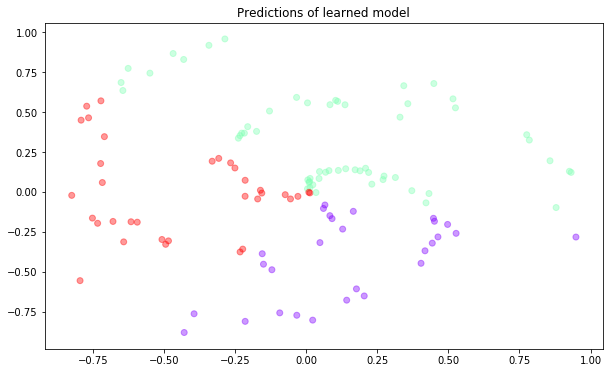

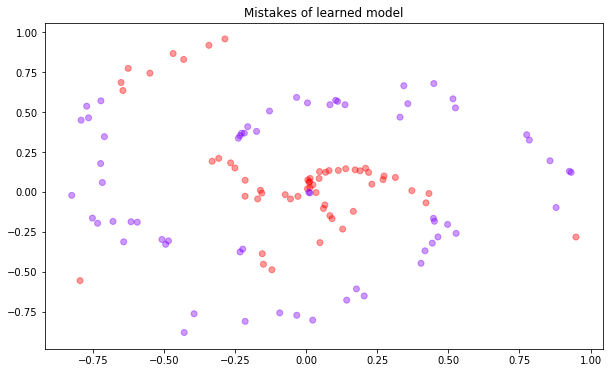

In [6]:
# Plot predictions of Keras model.
y_val_preds = model.predict(X_val)
# Use argmax to turn one-hot encoding back to integer encoding.
plot_data(X_val, np.argmax(y_val_preds, axis=1), 'Predictions of learned model')

# Highlight mistakes.
plot_data(X_val,
          np.argmax(y_val_preds, axis=1) != np.argmax(y_val, axis=1),
          'Mistakes of learned model')

![](files/img/mlp.gif)
Figure from http://rfhs8012.fh-regensburg.de/~saj39122/jfroehl/diplom/e-12-text.html

In [7]:
# As can be seen, "shallow" one layer models can't handle non-linear decision 
# boundaries. But, by adding an intermediate "hidden" layer, we have a 
# "deep" model that can learn a non-linear boundary.

model = Sequential()
# The hidden layer maps the input to a 100-dimensional representation.
nhidden = 100
input_shape = (2,)
model.add(Dense(nhidden, activation='relu', input_shape=input_shape))
# The output layer maps the 100-dimensional representation to a 3-D probability distribution.
model.add(Dense(nclasses, activation='softmax'))
print(model.summary())

model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.fit(X_train, y_train, epochs=2000, validation_data=(X_val, y_val), verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 603
Trainable params: 603
Non-trainable params: 0
_________________________________________________________________
None


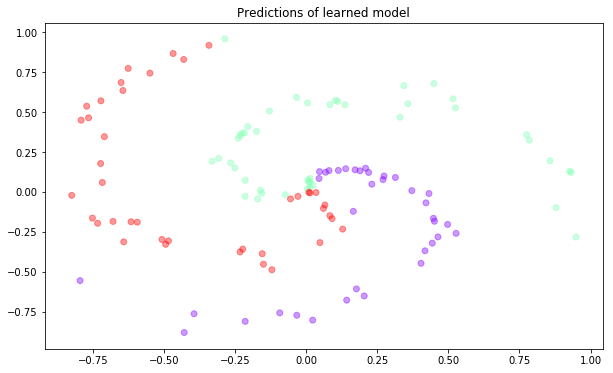

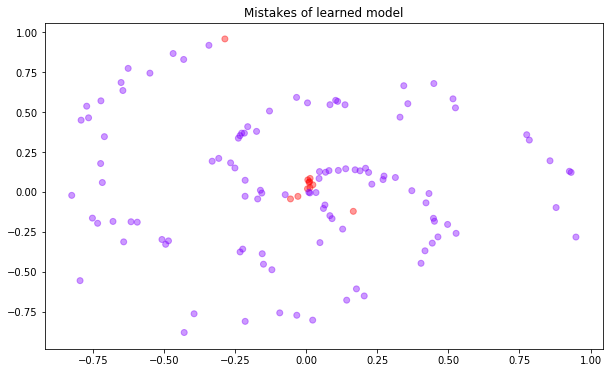

In [8]:
# Plot predictions of Keras model.
y_val_preds = model.predict(X_val)
# Use argmax to turn one-hot encoding back to integer encoding.
plot_data(X_val, np.argmax(y_val_preds, axis=1), 'Predictions of learned model')

# Highlight mistakes.
plot_data(X_val,
          np.argmax(y_val_preds, axis=1) != np.argmax(y_val, axis=1),
          'Mistakes of learned model')